In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time

In [2]:
from sklearn.manifold import TSNE

## Generate sintatic data

In [91]:
np.random.seed(50)

In [92]:
num_class_1 = 100
num_class_2 = 100

In [93]:
mean1 = np.array([1,1])
cov1 =  np.array([[1, 0.2],[0.2, 1]])
X1 = np.random.multivariate_normal(mean1, cov1, num_class_1)
y1 = np.zeros((num_class_1))

In [94]:
mean2 = np.array([10,1])
cov2 =  np.array([[0.1, 0],[0, 0.1]])
X2 = np.random.multivariate_normal(mean2, cov2, num_class_2)
y2 = np.ones((num_class_2))

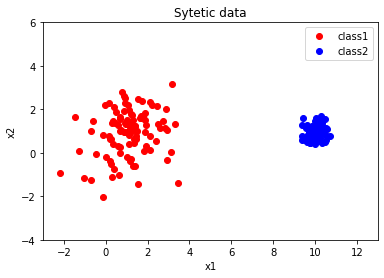

In [95]:
plt.plot(X1[:,0], X1[:,1], 'ro')
plt.plot(X2[:,0], X2[:,1], 'bo')
plt.xlim([-3, 13])
plt.ylim([-4, 6])
plt.legend(['class1', 'class2'])
plt.title('Sytetic data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [96]:
X = np.concatenate((X1, X2), axis = 0)
y = np.concatenate((y1, y2), axis = 0)

In [97]:
t_SNE = TSNE(n_components = 2, perplexity = 20, early_exaggeration = 1, method="exact")

In [98]:
start_time = time.time()
X_trans = t_SNE.fit_transform(X)
elapsed_time = time.time() - start_time

In [99]:
print("The execution of t-SNE last for ", elapsed_time, "s")

The execution of t-SNE last for  1.690448522567749 s


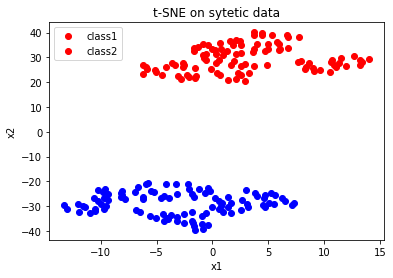

In [90]:
plt.plot(X_trans[np.where(y == 0),0], X_trans[np.where(y == 0),1], 'ro')
plt.plot(X_trans[np.where(y == 1),0], X_trans[np.where(y == 1),1], 'bo')
plt.legend(['class1', 'class2'])
plt.title('t-SNE on sytetic data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [7]:
test_arr = np.array([[1,2,1], [3,4,1], [3,2,2]])

In [8]:
test_arr

array([[1, 2, 1],
       [3, 4, 1],
       [3, 2, 2]])

In [11]:
np.sum(test_arr, 1)

array([4, 8, 7])

In [9]:
def compute_pairwise_distances(X, metric):
    if (metric == "euclidean") :
        distance = np.zeros((X.shape[0], X.shape[0]))
        start_time = time.time()
        for i in np.arange(0, X.shape[0]):
             distance[i,:] = np.sum((X - X[i, :])**2, axis = 1)
        elapsed_time = time.time() - start_time    
        print("last for ", elapsed_time, "s")
           
        return distance
        
    else:
        raise ValueError("Incorrect type of metric.")

## Perplexity

In [13]:
import math

In [14]:
def compute_pairwise_joint_probabilities(distances, perplexity, n_iter = 100, min_error_preplexity = 1e-4):
   
    n_samples = distances.shape[0]
    P_conditional = np.zeros((n_samples, n_samples))
    goal_entropy = np.log2(perplexity)

    # for each sample calculate optimal sigma_i
    for i in np.arange(0, n_samples):
        sigma_max = math.inf
        sigma_min = -math.inf
        sigma_i = 1
        
        # binary search for sigma_i
        for j in np.arange(0, n_iter):
            try:
                nominator = np.exp(- distances[i,:] / (2*sigma_i**2))
            except:
                print("Error")
            nominator[i] = 1e-10
            sum_Pi = np.sum(nominator)
            if  sum_Pi == 0:
                sum_Pi = 1e-10
                
            P_conditional[i,:] = nominator / sum_Pi
            
            # Check if this is running faster
            #sum_distance =  np.sum(P_conditional[i,:] * distances[i,:])
            # entropy = np.log2(sum_Pi) + sum_distance  / (2*sigma_i**2)
            
            entropy =  - np.sum(P_conditional[i,:] * np.log2(P_conditional[i,:] + 1e-10))
            entropy_diff = entropy - goal_entropy
            
            if np.abs(entropy_diff) < min_error_preplexity:
                break
            
            if entropy_diff < 0:
                sigma_min = sigma_i
                if sigma_max == math.inf:
                    sigma_i = sigma_i * 2
                else:
                    sigma_i = (sigma_i + sigma_max)/ 2
                
            else:
                sigma_max = sigma_i
                if sigma_min == -math.inf:
                    sigma_i = sigma_i / 2
                else:
                    sigma_i = (sigma_i + sigma_min)/ 2
            
    P = P_conditional + P_conditional.T
    sum_P = np.maximum(np.sum(P), 1e-7)
    P = np.maximum(P / sum_P, 1e-7)
    return P

In [15]:
distances = compute_pairwise_distances(X, "euclidean")

last for  0.08379769325256348 s


In [17]:
P = compute_pairwise_joint_probabilities(distances = distances, perplexity = 30, n_iter = 100, min_error_preplexity = 1e-4)

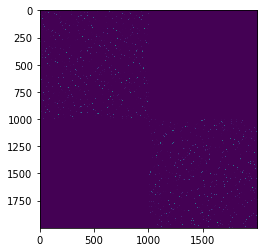

In [18]:
plt.imshow(P)

In [19]:
test_arr = np.array([[1,2,4], [3,4,1], [3,2,2]])

In [20]:
test_arr

array([[1, 2, 4],
       [3, 4, 1],
       [3, 2, 2]])

In [25]:
np.ravel(test_arr[0], order='K')

array([1, 2, 4])

In [26]:
test_arr[0]

array([1, 2, 4])

In [28]:
test_arr.ravel()

array([1, 2, 4, 3, 4, 1, 3, 2, 2])

In [30]:
t_SNE

TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=2, n_iter=1000, n_iter_without_progress=300, n_jobs=None,
     perplexity=30, random_state=None, verbose=0)